In [ ]:
# Just a heads up this code is quite sloppy
# Also for randomVI, sometimes the algorithm converges in like 1 step (especially if SAMPLE_SIZE is small)
# Which is definitely wrong so there is a bug somewhere in the randomIV part
# If this happends, just run it again and it'll probably work

# Most of the plots and convergence speeds seem to make sense to me but would love to hear what you guys think

In [67]:
import numpy as np
import random
import math
import copy
import matplotlib.pyplot as plt


class MDP:
    def __init__(self, gamma=0.9):
        self.gamma = 0.9
        self.all_states=[]
        for i in range(7):
            for j in range(7):
                self.all_states.append((i,j))
                
        self.cost = {}
        for i in self.all_states:
            if i == (0,1):
                self.cost[i] = 10
            elif i == (0,3):
                self.cost[i] = 10
            elif i == (1,1):
                self.cost[i] = 10
            elif i == (1,3):
                self.cost[i] = 10
            elif i == (1,5):
                self.cost[i] = 10
            elif i == (2,3):
                self.cost[i] = 10
            elif i == (2,5):
                self.cost[i] = 10
            elif i == (3,1):
                self.cost[i] = 10
                
            elif i == (3,1):
                self.cost[i] = 10
            elif i == (3,3):
                self.cost[i] = 10
            elif i == (3,5):
                self.cost[i] = 10
            elif i == (4,1):
                self.cost[i] = 10
            elif i == (4,3):
                self.cost[i] = 10
            elif i == (4,5):
                self.cost[i] = 10
            elif i == (5,1):
                self.cost[i] = 10
            elif i == (5,5):
                self.cost[i] = 10
                
            elif i == (6,1):
                self.cost[i] = 10
            elif i == (6,3):
                self.cost[i] = 10
            elif i == (6,4):
                self.cost[i] = 10
            elif i == (6,5):
                self.cost[i] = 10
                
            elif i == (6,6):
                self.cost[i] = -1
            else:
                self.cost[i] = 0
                
        self.actions = {
            (0,0):('D', 'R'), 
            (0,1):('D', 'R', 'L'),    
            (0,2):('D', 'L', 'R'),
            (0,3):('D', 'L', 'R'),
            (0,4):('D', 'L', 'R'),
            (0,5):('D', 'L', 'R'),
            (0,6):('D', 'L'),
            
            (1,0):('D', 'U', 'R'),
            (1,1):('D', 'R', 'L', 'U'),
            (1,2):('D', 'R', 'L', 'U'),
            (1,3):('D', 'R', 'L', 'U'),
            (1,4):('D', 'R', 'L', 'U'),
            (1,5):('D', 'R', 'L', 'U'),
            (1,6):('D', 'L', 'U'),
            
            (2,0):('U', 'D', 'R'),
            (2,1):('U', 'D', 'L', 'R'),
            (2,2):('U', 'D', 'L', 'R'),
            (2,3):('U', 'D', 'L', 'R'),
            (2,4):('U', 'D', 'L', 'R'),
            (2,5):('U', 'D', 'L', 'R'),
            (2,6):('U', 'L', 'D'),
            
            (3,0):('U', 'D', 'R'),
            (3,1):('U', 'D', 'L', 'R'),
            (3,2):('U', 'D', 'L', 'R'),
            (3,3):('U', 'D', 'L', 'R'),
            (3,4):('U', 'D', 'L', 'R'),
            (3,5):('U', 'D', 'L', 'R'),
            (3,6):('U', 'L', 'D'),
            
            (4,0):('U', 'D', 'R'),
            (4,1):('U', 'D', 'L', 'R'),
            (4,2):('U', 'D', 'L', 'R'),
            (4,3):('U', 'D', 'L', 'R'),
            (4,4):('U', 'D', 'L', 'R'),
            (4,5):('U', 'D', 'L', 'R'),
            (4,6):('U', 'L', 'D'),
            
            (5,0):('U', 'D', 'R'),
            (5,1):('U', 'D', 'L', 'R'),
            (5,2):('U', 'D', 'L', 'R'),
            (5,3):('U', 'D', 'L', 'R'),
            (5,4):('U', 'D', 'L', 'R'),
            (5,5):('U', 'D', 'L', 'R'),
            (5,6):('U', 'L', 'D'),
            
            
            
            (6,0):('R', 'U'),
            (6,1):('R', 'L', 'U'),
            (6,2):('R', 'L', 'U'),
            (6,3):('R', 'L', 'U'),
            (6,4):('R', 'L', 'U'),
            (6,5):('R', 'L', 'U'),
            (6,6):('X'),
            }
        
        self.stateNeighbors = {}
        for state in self.actions:
            neighbors = []
            next_state = (6, 6)
            for action in self.actions[state]:
                if action == 'U':
                    next_state = (state[0]-1, state[1])
                if action == 'D':
                    next_state = (state[0]+1, state[1])
                if action == 'L':
                    next_state = (state[0], state[1]-1)
                if action == 'R':
                    next_state = (state[0], state[1]+1)
                neighbors.append(next_state)
            self.stateNeighbors[state] = neighbors
        
    def states(self):
        return self.all_states
    
    def getCost(self, state):
        
        return self.cost[state]
    
    def getActions(self, state):
        return self.actions[state]
    
    def getNeighbors(self):
        return self.stateNeighbors
    
    def printCost(self):
        for i in range(7):
            for j in range(7):
                print(self.cost[(i, j)], end =' ')
            print("\n")
    
    
def printPolicy(policy):
    for i in range(7):
        for j in range(7):
            print(policy[(i, j)], end =' ')
        print("\n")



In [74]:

ERROR = 0.1
GAMMA = 0.8
EPSILON = 0.000001
errors_list = []


mdp = MDP()
iteration = 0
y = {state: 0 for state in mdp.states()}
policy = {state:'None' for state in mdp.states()}

while True:
    iteration += 1
    updated_y = copy.deepcopy(y)
    for state in mdp.states(): # for each state
        potential_yi_list = []
        for action in mdp.getActions(state): # for each action at that state
            
            
            # get the next state if that action is taken
            next_state = (0,0)
            if action == 'U':
                next_state = (state[0]-1, state[1])
            if action == 'D':
                next_state = (state[0]+1, state[1])
            if action == 'L':
                next_state = (state[0], state[1]-1)
            if action == 'R':
                next_state = (state[0], state[1]+1)
                
                
            
            # go to the next state with probability(1 - ERROR)
            potential_yi = GAMMA * (1 - ERROR) * y[next_state]
            
            # with probability (ERROR) we will end up in one of the other neighboring states
            # this makes the program non-deterministic. 
            # we end up in each one of the unintended states with probability (ERROR / numNeighbors)
            for rand_state in mdp.getNeighbors()[state]:
                numNeighbors = len(mdp.getNeighbors()[state]) - 1
                if state != (6, 6):
                    potential_yi += GAMMA * (ERROR / numNeighbors) * y[rand_state]
                    
            if (state == (6, 6)): # if we are at the final state, there are no further actions
                potential_yi_list.append((0 + mdp.cost[state], action))
            else:
                potential_yi_list.append((mdp.cost[next_state] + potential_yi, action))
                
        updated_y[state] = min(potential_yi_list)[0] # save the updated y as min of potential yi
        policy[state] = min(potential_yi_list)[1] # save the corresponding policy

    max_error = max(abs(y[state] - updated_y[state]) for state in mdp.states())
    errors_list.append(max_error)
    if max_error <= EPSILON:
        print("REGULAR IV")
        print("done")
        print("Number of iterations: " + str(iteration))
        break


    y = updated_y


REGULAR IV
done
Number of iterations: 44


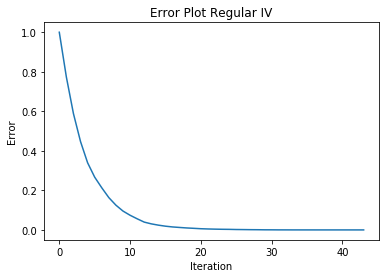

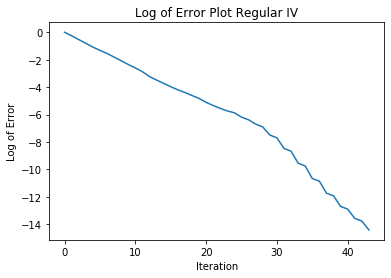

number of iterations: 44
solved policy: 
D R D R R R D 

D R D R U R D 

R R D R U R D 

U R D R U R D 

U R D R U R D 

U R R R U R D 

U R U U U R X 

costs: 
0 10 0 10 0 0 0 

0 10 0 10 0 10 0 

0 0 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 0 0 10 0 

0 10 0 10 10 10 -1 



In [75]:
#plot errors to see convergence


plt.plot(np.array(errors_list))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error Plot Regular IV")

plt.show()

# Log of our error plot 

plt.plot(np.array((np.log(errors_list))))
plt.xlabel("Iteration")
plt.ylabel("Log of Error")
plt.title("Log of Error Plot Regular IV")

plt.show()

print("number of iterations: " + str(iteration))
print("solved policy: ")
printPolicy(policy)
print("costs: ")
mdp.printCost()


In [76]:
#RANDOM

ERROR = 0.1
GAMMA = 0.8
EPSILON = 0.000001
SAMPLE_SIZE = 30
errors_list = []


mdp = MDP()
iteration = 0
y = {state: 0 for state in mdp.states()}
policy = {state:'None' for state in mdp.states()}

while True:
    iteration += 1
    updated_y = copy.deepcopy(y)
    B = random.sample(mdp.states(), SAMPLE_SIZE)
    for state in B: # for each state
        potential_yi_list = []
        for action in mdp.getActions(state): # for each action at that state
            
            # get the next state if that action is taken
            next_state = (0,0)
            if action == 'U':
                next_state = (state[0]-1, state[1])
            if action == 'D':
                next_state = (state[0]+1, state[1])
            if action == 'L':
                next_state = (state[0], state[1]-1)
            if action == 'R':
                next_state = (state[0], state[1]+1)
                
                
            
            # go to the next state with probability(1 - ERROR)
            potential_yi = GAMMA * (1 - ERROR) * y[next_state]
            
            # with probability (ERROR) we will end up in one of the other neighboring states
            # this makes the program non-deterministic. 
            # we end up in each one of the unintended states with probability (ERROR / numNeighbors)
            for rand_state in mdp.getNeighbors()[state]:
                numNeighbors = len(mdp.getNeighbors()[state]) - 1
                if state != (6, 6):
                    potential_yi += GAMMA * (ERROR / numNeighbors) * y[rand_state]
                    
            if (state == (6, 6)):
                potential_yi_list.append((0 + mdp.cost[state], action))
            else:
                potential_yi_list.append((mdp.cost[next_state] + potential_yi, action))
                
        updated_y[state] = min(potential_yi_list)[0] # save the updated y as min of potential yi
        policy[state] = min(potential_yi_list)[1] # save the corresponding policy

    max_error = max(abs(y[state] - updated_y[state]) for state in mdp.states())
    errors_list.append(max_error)
    if max_error <= EPSILON:
        print("RANDOM")
        print("done")
        print("Number of iterations: " + str(iteration))
        break


    y = updated_y


RANDOM
done
Number of iterations: 77


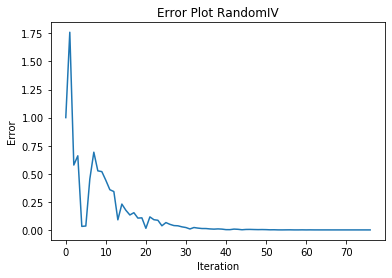

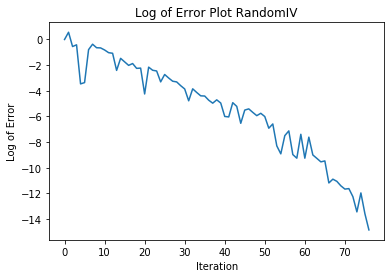

number of iterations: 77
solved policy: 
D R D R R R D 

D R D R U R D 

R R D R U R D 

U R D R U R D 

U R D R U R D 

U R R R U R D 

U R U U U R X 

costs: 
0 10 0 10 0 0 0 

0 10 0 10 0 10 0 

0 0 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 0 0 10 0 

0 10 0 10 10 10 -1 



In [77]:
plt.plot(np.array(errors_list))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error Plot RandomIV")

plt.show()

# Log of our error plot 

plt.plot(np.array((np.log(errors_list))))
plt.xlabel("Iteration")
plt.ylabel("Log of Error")
plt.title("Log of Error Plot RandomIV")

plt.show()

print("number of iterations: " + str(iteration))
print("solved policy: ")
printPolicy(policy)
print("costs: ")
mdp.printCost()

In [78]:
# CYCLIC

ERROR = 0.1
GAMMA = 0.8
EPSILON = 0.000001
errors_list = []


mdp = MDP()
iteration = 0
y = {state: 0 for state in mdp.states()}
policy = {state:'None' for state in mdp.states()}

while True:
    iteration += 1
    updated_y = copy.deepcopy(y)
    for state in mdp.states(): # for each state
        potential_yi_list = []
        for action in mdp.getActions(state): # for each action at that state
            
            # get the next state if that action is taken
            next_state = (0,0)
            if action == 'U':
                next_state = (state[0]-1, state[1])
            if action == 'D':
                next_state = (state[0]+1, state[1])
            if action == 'L':
                next_state = (state[0], state[1]-1)
            if action == 'R':
                next_state = (state[0], state[1]+1)
                
                
            
            # go to the next state with probability(1 - ERROR)
            potential_yi = GAMMA * (1 - ERROR) * y[next_state]
            
            # with probability (ERROR) we will end up in one of the other neighboring states
            # this makes the program non-deterministic. 
            # we end up in each one of the unintended states with probability (ERROR / numNeighbors)
            for rand_state in mdp.getNeighbors()[state]:
                numNeighbors = len(mdp.getNeighbors()[state]) - 1
                if state != (6, 6):
                    potential_yi += GAMMA * (ERROR / numNeighbors) * y[rand_state]
                    
            if (state == (6, 6)):
                potential_yi_list.append((0 + mdp.cost[state], action))
            else:
                potential_yi_list.append((mdp.cost[next_state] + potential_yi, action))
                
        y[state] = min(potential_yi_list)[0] # save the updated y as min of potential yi
        policy[state] = min(potential_yi_list)[1] # save the corresponding policy

    max_error = max(abs(y[state] - updated_y[state]) for state in mdp.states())
    errors_list.append(max_error)
    if max_error <= EPSILON:
        print("CYCLIC")
        print("done")
        print("Number of iterations: " + str(iteration))
        break


    


CYCLIC
done
Number of iterations: 29


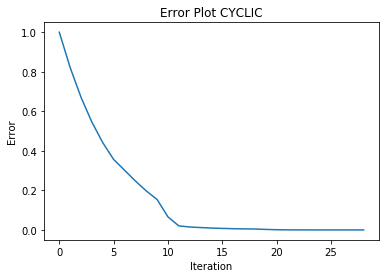

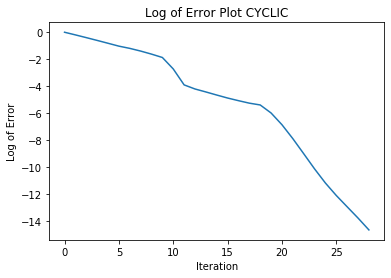

number of iterations: 29
solved policy: 
D R D R R R D 

D R D R U R D 

R R D R U R D 

U R D R U R D 

U R D R U R D 

U R R R U R D 

U R U U U R X 

costs: 
0 10 0 10 0 0 0 

0 10 0 10 0 10 0 

0 0 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 0 0 10 0 

0 10 0 10 10 10 -1 



In [79]:
plt.plot(np.array(errors_list))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error Plot CYCLIC")

plt.show()

# Log of our error plot 

plt.plot(np.array((np.log(errors_list))))
plt.xlabel("Iteration")
plt.ylabel("Log of Error")
plt.title("Log of Error Plot CYCLIC")

plt.show()

print("number of iterations: " + str(iteration))
print("solved policy: ")
printPolicy(policy)
print("costs: ")
mdp.printCost()

In [80]:
# RANDOMCYCLIC

# CYCLIC

ERROR = 0.1
GAMMA = 0.8
EPSILON = 0.000001
errors_list = []


mdp = MDP()
iteration = 0
y = {state: 0 for state in mdp.states()}
policy = {state:'None' for state in mdp.states()}
shuffled_states = mdp.states()

while True:
    iteration += 1
    updated_y = copy.deepcopy(y)
    random.shuffle(shuffled_states)
    for state in shuffled_states: # for each state
        potential_yi_list = []
        for action in mdp.getActions(state): # for each action at that state
            
            # get the next state if that action is taken
            next_state = (0,0)
            if action == 'U':
                next_state = (state[0]-1, state[1])
            if action == 'D':
                next_state = (state[0]+1, state[1])
            if action == 'L':
                next_state = (state[0], state[1]-1)
            if action == 'R':
                next_state = (state[0], state[1]+1)
                
                
            
            # go to the next state with probability(1 - ERROR)
            potential_yi = GAMMA * (1 - ERROR) * y[next_state]
            
            # with probability (ERROR) we will end up in one of the other neighboring states
            # this makes the program non-deterministic. 
            # we end up in each one of the unintended states with probability (ERROR / numNeighbors)
            for rand_state in mdp.getNeighbors()[state]:
                numNeighbors = len(mdp.getNeighbors()[state]) - 1
                if state != (6, 6):
                    potential_yi += GAMMA * (ERROR / numNeighbors) * y[rand_state]
                    
            if (state == (6, 6)):
                potential_yi_list.append((0 + mdp.cost[state], action))
            else:
                potential_yi_list.append((mdp.cost[next_state] + potential_yi, action))
                
        y[state] = min(potential_yi_list)[0] # save the updated y as min of potential yi
        policy[state] = min(potential_yi_list)[1] # save the corresponding policy

    max_error = max(abs(y[state] - updated_y[state]) for state in mdp.states())
    errors_list.append(max_error)
    if max_error <= EPSILON:
        print("RANDOM CYCLIC")
        print("done")
        print("Number of iterations: " + str(iteration))
        break


    


RANDOM CYCLIC
done
Number of iterations: 31


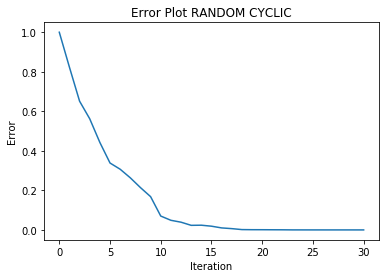

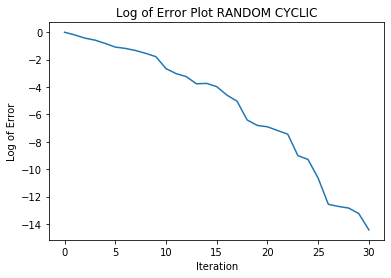

number of iterations: 31
solved policy: 
D R D R R R D 

D R D R U R D 

R R D R U R D 

U R D R U R D 

U R D R U R D 

U R R R U R D 

U R U U U R X 

costs: 
0 10 0 10 0 0 0 

0 10 0 10 0 10 0 

0 0 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 10 0 10 0 

0 10 0 0 0 10 0 

0 10 0 10 10 10 -1 



In [81]:
plt.plot(np.array(errors_list))
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error Plot RANDOM CYCLIC")

plt.show()

# Log of our error plot 

plt.plot(np.array((np.log(errors_list))))
plt.xlabel("Iteration")
plt.ylabel("Log of Error")
plt.title("Log of Error Plot RANDOM CYCLIC")

plt.show()

print("number of iterations: " + str(iteration))
print("solved policy: ")
printPolicy(policy)
print("costs: ")
mdp.printCost()